In [207]:
from util_cleaning import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import numpy as np

In [208]:
df_2007 = pd.read_csv(DATABASE_PATH+'cleaned_data/power_2007.csv', sep = ';')
df_2008 = pd.read_csv(DATABASE_PATH+'cleaned_data/power_2008.csv', sep = ';')
df_2009 = pd.read_csv(DATABASE_PATH+'cleaned_data/power_2009.csv', sep = ';')
df_2010 = pd.read_csv(DATABASE_PATH+'cleaned_data/power_2010.csv', sep = ';')

In [209]:
df_2007.head()

,date,time,g_active_power,g_reactive_power,voltage,global_intensity,sub_1_kitchen,sub_2_laundry,sub_3_wh_ac
0,1/1/2007,00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,1/1/2007,00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,1/1/2007,00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,1/1/2007,00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,1/1/2007,00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0


In [210]:
df_2007 = time_rescale(df_2007, '1D')
df_2008 = time_rescale(df_2008, '1D')
df_2009 = time_rescale(df_2009, '1D')
df_2010 = time_rescale(df_2010, '1D')

Processe begin...

Begin configuring datetime line ...done
Begin dropping bug data ... done
done

Processe begin...

Begin configuring datetime line ...done
Begin dropping bug data ... done
done

Processe begin...

Begin configuring datetime line ...done
Begin dropping bug data ... done
done

Processe begin...

Begin configuring datetime line ...done
Begin dropping bug data ... done
done



In [211]:
df = pd.concat([df_2007,df_2008,df_2009,df_2010])

In [212]:
df = df.reset_index()
df = df.drop(['index'],axis=1)

In [213]:
df

,full_time,g_active_power,g_reactive_power,voltage,global_intensity,sub_1_kitchen,sub_2_laundry,sub_3_wh_ac
0,2007-01-01,1.909031,0.102836,240.128979,7.916944,0.000000,0.244444,4.083333
1,2007-01-02,1.245669,0.103290,240.392139,5.238889,0.285417,0.268056,9.128472
2,2007-01-03,0.359419,0.074742,241.321403,1.508889,0.000000,0.219444,1.375000
3,2007-01-04,1.814479,0.136135,240.024486,7.637708,0.541319,1.627083,13.547917
4,2007-01-05,1.124064,0.123749,234.730799,4.932431,0.643750,0.455556,5.934722
...,...,...,...,...,...,...,...,...
1436,2010-12-07,0.770538,0.196579,240.218646,3.397222,0.327827,0.448611,4.475000
1437,2010-12-08,0.367846,0.117429,240.794931,1.623750,0.000000,0.356944,2.765278
1438,2010-12-09,1.105406,0.136545,241.619722,4.701875,0.204167,0.947917,6.174306
1439,2010-12-10,1.076806,0.115171,240.260674,4.587500,0.384722,0.477778,6.813889


# Choose K

In [234]:
scaler = MinMaxScaler()

In [235]:
df_to_scale = df.iloc[:,[1,4,5,6,7]]
df_to_scale = df_to_scale.dropna(how =  'any')
df_to_scale

,g_active_power,global_intensity,sub_1_kitchen,sub_2_laundry,sub_3_wh_ac
0,1.909031,7.916944,0.000000,0.244444,4.083333
1,1.245669,5.238889,0.285417,0.268056,9.128472
2,0.359419,1.508889,0.000000,0.219444,1.375000
3,1.814479,7.637708,0.541319,1.627083,13.547917
4,1.124064,4.932431,0.643750,0.455556,5.934722
...,...,...,...,...,...
1436,0.770538,3.397222,0.327827,0.448611,4.475000
1437,0.367846,1.623750,0.000000,0.356944,2.765278
1438,1.105406,4.701875,0.204167,0.947917,6.174306
1439,1.076806,4.587500,0.384722,0.477778,6.813889


In [236]:
df_scaled = scaler.fit_transform(df_to_scale)
df_scaled

array([[0.72332732, 0.71016081, 0.        , 0.05273803, 0.24765194],
       [0.44680342, 0.44261908, 0.10503115, 0.05783205, 0.55363686],
       [0.07736837, 0.06998654, 0.        , 0.04734437, 0.083393  ],
       ...,
       [0.38833468, 0.3889706 , 0.07513177, 0.2045097 , 0.37446826],
       [0.37641241, 0.37754437, 0.14157483, 0.10307888, 0.41325864],
       [0.45785146, 0.45833969, 0.14834691, 0.07326391, 0.43414901]])

## 1. Elbow Curve

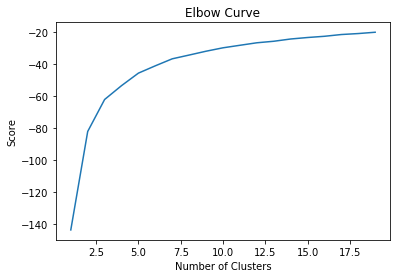

In [294]:
# optimum K
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.savefig(DATABASE_PATH + "Elbow Curve.png")
plt.show()

## 2. Silhouette_score

In [238]:
for n_clusters in range(2,20):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_scaled)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_scaled, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
# TO_DO: give a nice picture

For n_clusters = 2, silhouette score is 0.35342530210544154)
For n_clusters = 3, silhouette score is 0.30737773450466577)
For n_clusters = 4, silhouette score is 0.30947111263650695)
For n_clusters = 5, silhouette score is 0.2826611743256309)
For n_clusters = 6, silhouette score is 0.28934409697156255)
For n_clusters = 7, silhouette score is 0.26627916450524813)
For n_clusters = 8, silhouette score is 0.23477510858441591)
For n_clusters = 9, silhouette score is 0.2720409283075937)
For n_clusters = 10, silhouette score is 0.2529572998512872)
For n_clusters = 11, silhouette score is 0.24958352032018483)
For n_clusters = 12, silhouette score is 0.25547004111332944)
For n_clusters = 13, silhouette score is 0.2569067754844366)
For n_clusters = 14, silhouette score is 0.2346230697352029)
For n_clusters = 15, silhouette score is 0.23922305295239601)
For n_clusters = 16, silhouette score is 0.2625885317565346)
For n_clusters = 17, silhouette score is 0.24552290171829227)
For n_clusters = 18, s

# Test for Kmeans

In [277]:
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
kmeans.fit(df_scaled)
df_to_scale['weather_cluster'] = kmeans.labels_
df_to_scale

,g_active_power,global_intensity,sub_1_kitchen,sub_2_laundry,sub_3_wh_ac,weather_cluster
0,1.909031,7.916944,0.000000,0.244444,4.083333,0
1,1.245669,5.238889,0.285417,0.268056,9.128472,2
2,0.359419,1.508889,0.000000,0.219444,1.375000,1
3,1.814479,7.637708,0.541319,1.627083,13.547917,0
4,1.124064,4.932431,0.643750,0.455556,5.934722,2
...,...,...,...,...,...,...
1436,0.770538,3.397222,0.327827,0.448611,4.475000,1
1437,0.367846,1.623750,0.000000,0.356944,2.765278,1
1438,1.105406,4.701875,0.204167,0.947917,6.174306,2
1439,1.076806,4.587500,0.384722,0.477778,6.813889,2


In [278]:
df_scaled

array([[0.72332732, 0.71016081, 0.        , 0.05273803, 0.24765194],
       [0.44680342, 0.44261908, 0.10503115, 0.05783205, 0.55363686],
       [0.07736837, 0.06998654, 0.        , 0.04734437, 0.083393  ],
       ...,
       [0.38833468, 0.3889706 , 0.07513177, 0.2045097 , 0.37446826],
       [0.37641241, 0.37754437, 0.14157483, 0.10307888, 0.41325864],
       [0.45785146, 0.45833969, 0.14834691, 0.07326391, 0.43414901]])

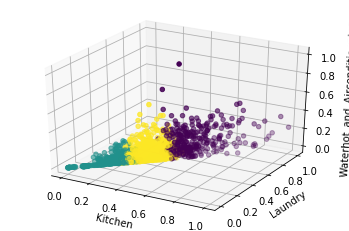

In [279]:

weather_energy = df_to_scale

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter( df_scaled[:,0], 
            df_scaled[:,1],
           df_scaled[:,2],
            c = weather_energy.weather_cluster)
ax.set_xlabel('Kitchen')
ax.set_ylabel('Laundry')
ax.set_zlabel('Waterhot_and_Airconditionning')

plt.show()

In [280]:
def plot_3d(df,i,j,k):
#     weather_energy = df_to_scale

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    
    ax.scatter( df.iloc[:,i], 
                df.iloc[:,j],
               df.iloc[:,k],
                c = df.weather_cluster)
    ax.set_xlabel(df.columns[i])
    ax.set_ylabel(df.columns[j])
    ax.set_zlabel(df.columns[k])
    plt.savefig(DATABASE_PATH + "pictures/"+df.columns[i][:5] +'and'+ df.columns[j][:5]+'and'+ df.columns[k][:5] + " k3_3d.png")
    plt.show()

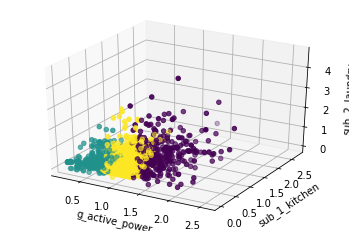

In [283]:
plot_3d(df_to_scale,0,2,3)

In [269]:
df_to_scale

,g_active_power,global_intensity,sub_1_kitchen,sub_2_laundry,sub_3_wh_ac,weather_cluster
0,1.909031,7.916944,0.000000,0.244444,4.083333,0
1,1.245669,5.238889,0.285417,0.268056,9.128472,0
2,0.359419,1.508889,0.000000,0.219444,1.375000,1
3,1.814479,7.637708,0.541319,1.627083,13.547917,0
4,1.124064,4.932431,0.643750,0.455556,5.934722,0
...,...,...,...,...,...,...
1436,0.770538,3.397222,0.327827,0.448611,4.475000,1
1437,0.367846,1.623750,0.000000,0.356944,2.765278,1
1438,1.105406,4.701875,0.204167,0.947917,6.174306,0
1439,1.076806,4.587500,0.384722,0.477778,6.813889,0


In [243]:
# plt.plot(df_2007['full_time'],df_2007['sub_3_wh_ac'])

In [284]:
def plot_clustering(weather_energy,i=0,j=1):
    fig, ax1 = plt.subplots(figsize = (10,7))
    ax1.scatter(weather_energy.iloc[:,i], 
                weather_energy.iloc[:,j], 
#                 s = weather_energy.windSpeed*10,
                c = weather_energy.weather_cluster)
    ax1.set_xlabel(weather_energy.columns[i])
    ax1.set_ylabel(weather_energy.columns[j])
    plt.savefig(DATABASE_PATH + "pictures/"+weather_energy.columns[i][:5] +' vs '+ weather_energy.columns[j][:5]+"k3.png")
    plt.show()

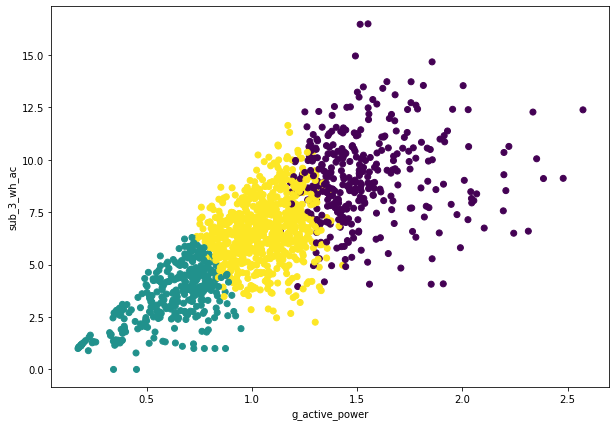

In [291]:
p1 = plot_clustering(df_to_scale,0,4)

In [252]:
 weather_energy.columns[3][1]


'u'